# Models: Bag of Words - Results

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn

from pprint import pprint

%matplotlib inline

In [2]:
data_in = '../data/04_models_bag_of_words'

pprint(sorted(os.listdir(data_in)))

['_old',
 'acc',
 'acc.csv',
 'acc_20180904200941.csv',
 'data.csv',
 'out',
 'out.csv',
 'out_20180904200941.csv',
 'tim',
 'tim.csv',
 'tim_20180904200941.csv']


In [3]:
plot_out = '../plots/04_models_bag_of_words'

## Functions

In [102]:
# %load '../snippets/conf_mtx.py'
def conf_mtx(df, t):
    df = pd.concat([(df.sum(axis=1) >= df.shape[1] / 2), t], axis=1)
    df.columns=['y', 't']
    
    pos = df[df['t'] == True]
    neg = df[df['t'] == False]

    tp = (pos['y'] == True).sum()
    fn = (pos['y'] == False).sum()
    fp = (neg['y'] == True).sum()
    tn = (neg['y'] == False).sum()
    
    print('TP:', tp)
    print('FN:', fn)
    print('FP:', fp)
    print('TN:', tn, end='\n\n')

    print('Accuracy:', ((tp + tn) / (tp + fn + fp + tn) * 100).round(dec), end='\n\n')
    
    prec = (tp / (tp + fp))
    rcll = (tp / (tp + fn))
    f1   = 2 * (prec * rcll) / (prec + rcll)

    print('Precision:', prec.round(dec))
    print('Recall:',rcll.round(dec))
    print('F1-score:', f1.round(dec))
    
    return tp, fn, fp, tn

## Results

### Loading by concatenation

In [4]:
# acc = list()
# out = list()
# tim = list()

# for file in sorted(os.listdir(f'{data_in}/acc')):
#     acc.append(pd.read_csv(f'{data_in}/acc/{file}', index_col='Unnamed: 0'))
# for file in sorted(os.listdir(f'{data_in}/out')):
#     out.append(pd.read_csv(f'{data_in}/out/{file}', index_col='Unnamed: 0'))
# for file in sorted(os.listdir(f'{data_in}/tim')):
#     tim.append(pd.read_csv(f'{data_in}/tim/{file}', index_col='Unnamed: 0'))

# acc_df = pd.concat(acc)
# out_df = pd.concat(out, axis=1)
# tim_df = pd.concat(tim)

### "Direct" loading

In [5]:
acc_df = pd.read_csv(f'{data_in}/acc.csv', index_col='Unnamed: 0')
out_df = pd.read_csv(f'{data_in}/out.csv', index_col='Unnamed: 0')
tim_df = pd.read_csv(f'{data_in}/tim.csv', index_col='Unnamed: 0')

In [6]:
results = pd.DataFrame([acc_df.mean(axis=1), tim_df.sum(axis=1)]).transpose()
results.columns = ['Accuracy', 'Time']

In [7]:
# results.sort_values(by='Accuracy', ascending=False) \
#        .style.background_gradient(cmap='Oranges')

### Settings

In [84]:
cls = ['ET', 'LogReg', 'NB', 'NN', 'RF']
fts = [1000, 2500, 5000]
rxs = ['', '_sw', '_lm', '_sm', '_sw_lm', '_sw_sm', '_lm_sm', '_sw_lm_sm']

roi = pd.Series(['', '_lm', '_sm', '_lm_sm'])

cls_full = {
    'ET'     : 'Extra Trees',
    'LogReg' : 'Logistic Regression',
    'NB'     : 'Naïve Bayes',
    'NN'     : 'Neural Network',
    'RF'     : 'Random Forests'
}

rxs_full = {
    ''          : 'No additional preprocessing',
    '_sw'       : 'Without stop words',
    '_lm'       : 'Lemmatization',
    '_sm'       : 'Stemming',
    '_sw_lm'    : 'W/O stop words + Lemm.',
    '_sw_sm'    : 'W/O stop words + Stem.' ,
    '_lm_sm'    : 'Lemm. + Stem.',
    '_sw_lm_sm' : 'W/O stop words + Lemm. + Stem.'
}

roi_full = [rxs_full[rx] for rx in roi]

dec = 4  # number of decimal places

### Initial results

#### Accuracy analysis

In [9]:
acc_dict = dict()

for cl in cls:
    if cl not in acc_dict.keys():
        acc_dict[cl] = dict()
    
    for rx in rxs:
        acc_dict[cl][rx] = results['Accuracy'].filter(regex=f'.*f{rx}_{cl}.*')
        acc_dict[cl][rx].index = fts
        
    acc_dict[cl] = pd.DataFrame(acc_dict[cl]) * 100

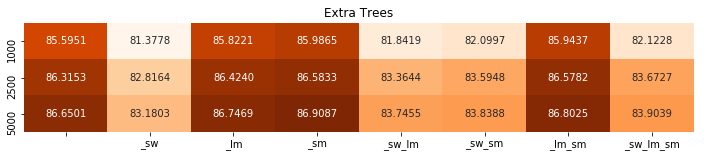

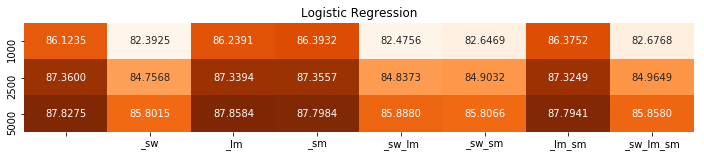

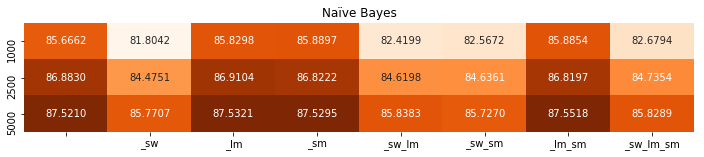

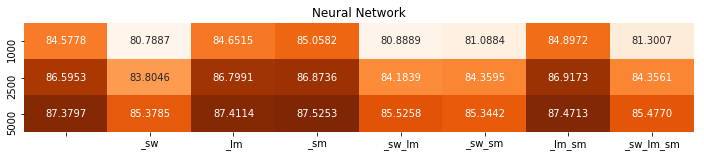

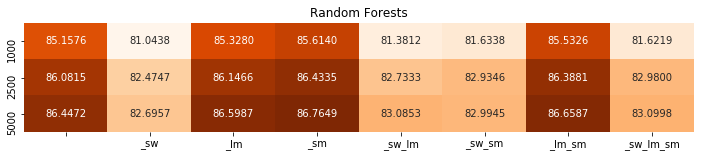

In [10]:
for cl in cls:
    plt.figure(figsize=(12, 2))
    seaborn.heatmap(acc_dict[cl], cmap='Oranges', annot=True, fmt='.4f', cbar=0)
    plt.title(cls_full[cl])
    plt.show()

#### Time analysis

In [11]:
tim_dict = dict()

for cl in cls:
    if cl not in tim_dict.keys():
        tim_dict[cl] = dict()
    
    for rx in rxs:
        tim_dict[cl][rx] = results['Time'].filter(regex=f'.*f{rx}_{cl}.*')
        tim_dict[cl][rx].index = fts
        
    tim_dict[cl] = pd.DataFrame(tim_dict[cl])

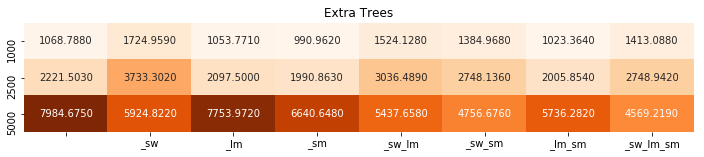

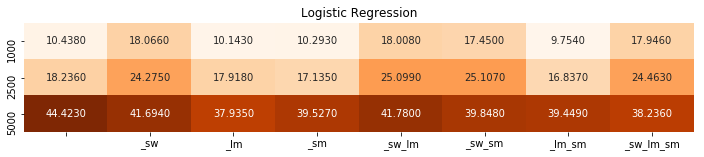

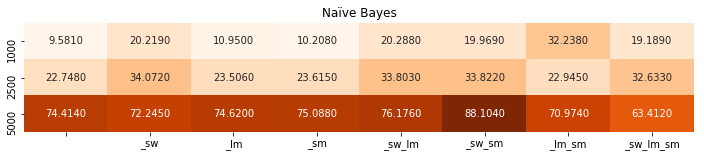

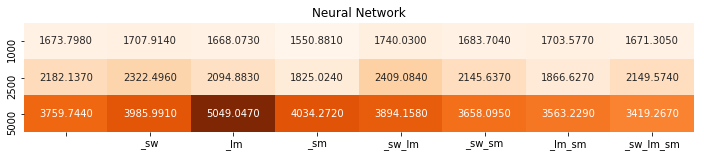

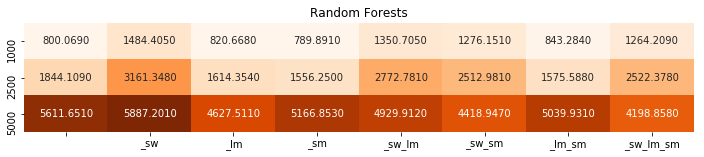

In [12]:
for cl in cls:
    plt.figure(figsize=(12, 2))
    seaborn.heatmap(tim_dict[cl], cmap='Oranges', annot=True, fmt='.4f', cbar=0)
    plt.title(cls_full[cl])
    plt.show()

#### Accuracy/Time plots

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


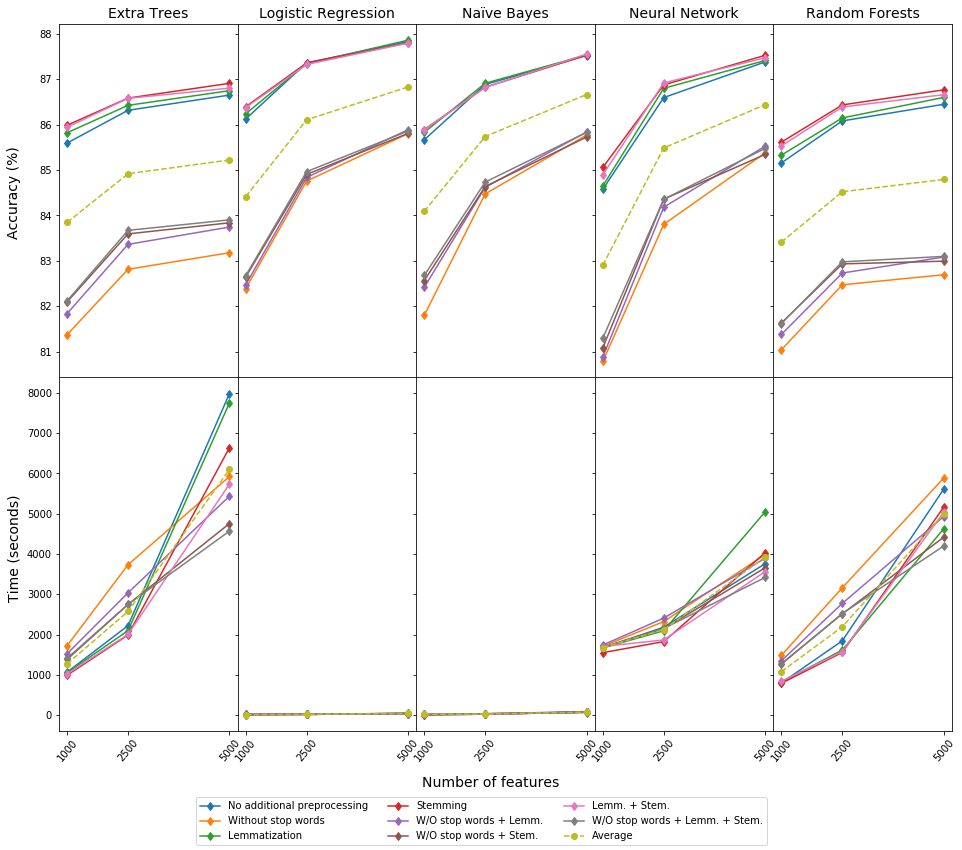

In [98]:
f, (axs_acc, axs_tim) = plt.subplots(2, 5, sharex='col', sharey='row', figsize=(16,13))

f.subplots_adjust(hspace=0, wspace=0)

for i in range(len(cls)):
    axs_acc[i].plot(acc_dict[cls[i]], '-d')
    axs_acc[i].plot(acc_dict[cls[i]].mean(axis=1), '--o')
    axs_acc[i].set_title(cls_full[cls[i]], fontsize=14)
    axs_acc[i].set_xticks(fts)
    axs_acc[i].set_xticklabels(fts, rotation=50)
    
for i in range(len(cls)):
    axs_tim[i].plot(tim_dict[cls[i]], '-d')
    axs_tim[i].plot(tim_dict[cls[i]].mean(axis=1), '--o')
    axs_tim[i].set_xticks(fts)
    axs_tim[i].set_xticklabels(fts, rotation=50)
    
f.legend([rxs_full[rx] for rx in rxs] + ['Average'], loc=8, ncol=3)
# f.suptitle('Comparison between several classifiers', fontsize=16)

f.text(0.50, 0.065, 'Number of features', ha='center', fontsize=14)
f.text(0.08, 0.70,  'Accuracy (%)', va='center', rotation='vertical', fontsize=14)
f.text(0.08, 0.32,  'Time (seconds)', va='center', rotation='vertical', fontsize=14)

f.savefig(f'{plot_out}/00_initial_clf_comparison.png')
f.show()

#### Table

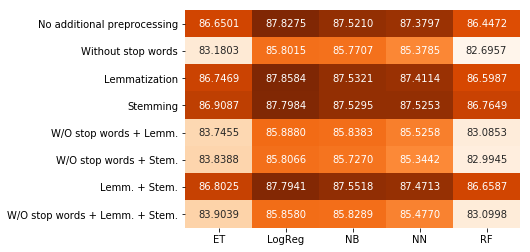

In [85]:
res_00 = pd.DataFrame({cl: acc_dict[cl].loc[5000] for cl in cls})
res_00.index = [rxs_full[rx] for rx in rxs]
res_00 = res_00.round(dec)

plt.figure()
seaborn.heatmap(res_00, cmap='Oranges', annot=True, fmt=f'.{dec}f', cbar=0)
plt.show()

#### Confusion matrix; Precision; Recall; F<sub>1</sub>-score of the best initial classifier

In [107]:
conf_mtx(pd.DataFrame(out_df['5000f_lm_LogReg_1.00C']), t)

TP: 50377
FN: 8013
FP: 6166
TN: 52224

Accuracy: 87.8584

Precision: 0.891
Recall: 0.8628
F1-score: 0.8766


(50377, 8013, 6166, 52224)

##### Time needed to evaluate

In [134]:
results['Time']['5000f_lm_LogReg_1.00C']

37.935

<hr style="height: 5px;" />

### After additional training of LogReg and NB

#### Logistic Regression (5000 features)

In [15]:
lr_param = pd.Series([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50])  # 0.00 <-- 0.0001

##### Accuracy

In [16]:
lr_acc_df = pd.concat([acc_df, pd.read_csv(f'{data_in}/acc_20180904200941.csv', index_col='Unnamed: 0')]) \
              .mean(axis=1) \
              .filter(regex='.*LogReg.*', axis=0)

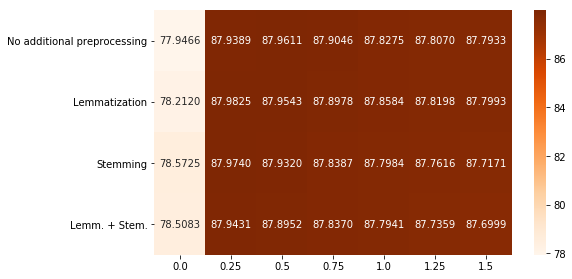

In [17]:
lr_acc_dict = dict()

for rx in rxs:
    lr_acc_dict[rx] = lr_acc_df.filter(regex=f'5000f{rx}_LogReg').sort_index()
    lr_acc_dict[rx].index = lr_param  # 'LogReg_' + ... + '_C'

lr_acc_dict = pd.DataFrame(lr_acc_dict) * 100
lr_acc_dict.columns = [rxs_full[rx] for rx in lr_acc_dict.columns]
# lr_acc_dict.columns = 'LR_' + lr_acc_dict.columns

plt.figure(figsize=(8, 4.5))
# seaborn.heatmap(lr_acc_dict['LR_' + roi], cmap='Oranges', annot=True, fmt='.4f', square=False, cbar=0)
seaborn.heatmap(lr_acc_dict[roi_full].transpose(),
                cmap='Oranges', annot=True, fmt='.4f', square=False)
plt.show()

##### Output

In [119]:
lr_out_df = pd.concat([out_df, pd.read_csv(f'{data_in}/out_20180904200941.csv', index_col='Unnamed: 0')], axis=1) \
              .filter(regex='.*LogReg.*', axis=1)
lr_out_df.head()

,1000f_LogReg_1.00C,1000f_sm_LogReg_1.00C,1000f_lm_LogReg_1.00C,1000f_lm_sm_LogReg_1.00C,5000f_LogReg_1.00C,5000f_sm_LogReg_1.00C,5000f_lm_LogReg_1.00C,5000f_lm_sm_LogReg_1.00C,2500f_LogReg_1.00C,2500f_sm_LogReg_1.00C,...,5000f_lm_sm_LogReg_0.50C,5000f_lm_sm_LogReg_0.75C,5000f_lm_sm_LogReg_1.25C,5000f_lm_sm_LogReg_1.50C,5000f_sw_lm_sm_LogReg_0.00C,5000f_sw_lm_sm_LogReg_0.25C,5000f_sw_lm_sm_LogReg_0.50C,5000f_sw_lm_sm_LogReg_0.75C,5000f_sw_lm_sm_LogReg_1.25C,5000f_sw_lm_sm_LogReg_1.50C
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


##### Time

In [135]:
lr_tim_df = pd.concat([tim_df, pd.read_csv(f'{data_in}/tim_20180904200941.csv', index_col='Unnamed: 0')]) \
              .sum(axis=1) \
              .filter(regex='.*LogReg.*', axis=0)

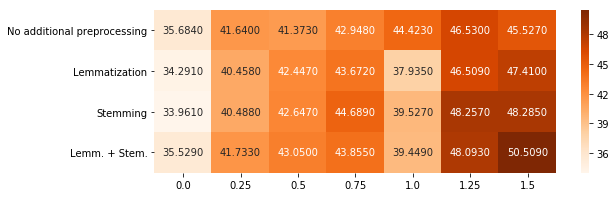

In [136]:
lr_tim_dict = dict()

for rx in rxs:
    lr_tim_dict[rx] = lr_tim_df.filter(regex=f'5000f{rx}_LogReg').sort_index()
    lr_tim_dict[rx].index = lr_param

lr_tim_dict = pd.DataFrame(lr_tim_dict)
lr_tim_dict.columns = [rxs_full[rx] for rx in lr_tim_dict.columns]
# lr_tim_dict.columns = 'LR_' + lr_tim_dict.columns

plt.figure(figsize=(9, 3))
# seaborn.heatmap(lr_tim_dict['LR_' + roi], cmap='Oranges', annot=True, fmt='.4f', square=False, cbar=0)
seaborn.heatmap(lr_tim_dict[roi_full].transpose(),
                cmap='Oranges', annot=True, fmt='.4f', square=False)
plt.show()

#### Naïve Bayes

In [25]:
nb_param = pd.Series([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50])

##### Accuracy

In [26]:
nb_acc_df = pd.concat([acc_df, pd.read_csv(f'{data_in}/acc_20180904200941.csv', index_col='Unnamed: 0')]) \
              .mean(axis=1) \
              .filter(regex='.*NB.*', axis=0)

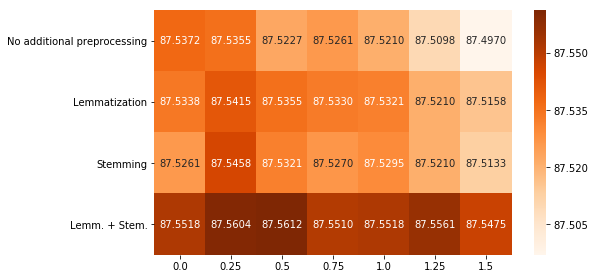

In [27]:
nb_acc_dict = dict()

for rx in rxs:
    nb_acc_dict[rx] = nb_acc_df.filter(regex=f'5000f{rx}_NB').sort_index()
    nb_acc_dict[rx].index = nb_param  # 'NB_' + ... + '_alpha'

nb_acc_dict = pd.DataFrame(nb_acc_dict) * 100
nb_acc_dict.columns = [rxs_full[rx] for rx in nb_acc_dict.columns]
# nb_acc_dict.columns = 'NB_' + nb_acc_dict.columns

plt.figure(figsize=(8, 4.5))
# seaborn.heatmap(nb_acc_dict['NB_' + pd.Series(roi)], cmap='Oranges', annot=True, fmt='.4f', square=False, cbar=0)
seaborn.heatmap(nb_acc_dict[roi_full].transpose(),
                cmap='Oranges', annot=True, fmt='.4f', square=False)
plt.show()

##### Time

In [137]:
nb_tim_df = pd.concat([tim_df, pd.read_csv(f'{data_in}/tim_20180904200941.csv',index_col='Unnamed: 0')]) \
              .sum(axis=1) \
              .filter(regex='.*NB.*', axis=0)

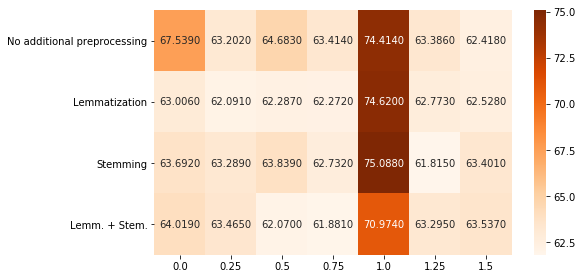

In [138]:
nb_tim_dict = dict()

for rx in rxs:
    nb_tim_dict[rx] = nb_tim_df.filter(regex=f'5000f{rx}_NB').sort_index()
    nb_tim_dict[rx].index = nb_param

nb_tim_dict = pd.DataFrame(nb_tim_dict)
nb_tim_dict.columns = [rxs_full[rx] for rx in nb_tim_dict.columns]
# nb_tim_dict.columns = 'LR_' + nb_tim_dict.columns

plt.figure(figsize=(8, 4.5))
# seaborn.heatmap(nb_tim_dict['LR_' + roi], cmap='Oranges', annot=True, fmt='.4f', square=False, cbar=0)
seaborn.heatmap(nb_tim_dict[roi_full].transpose(),
                cmap='Oranges', annot=True, fmt='.4f', square=False)
plt.show()

#### Graphical analysis

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


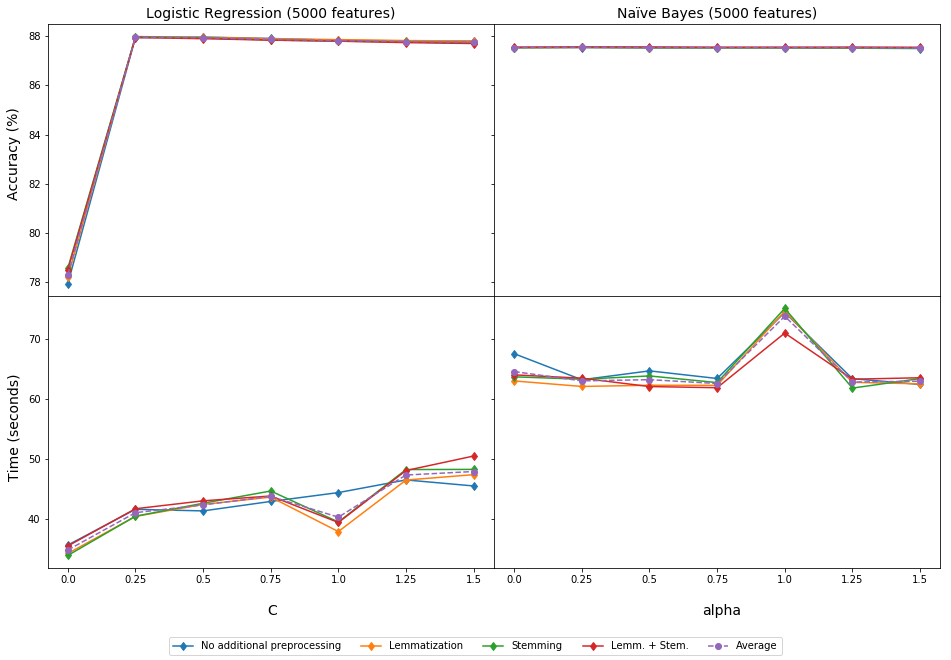

In [139]:
f, (axs_acc, axs_tim) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16,10))

f.subplots_adjust(hspace=0, wspace=0)

axs_acc[0].plot(lr_acc_dict[roi_full], '-d')
axs_acc[0].plot(lr_acc_dict[roi_full].mean(axis=1), '--o')
axs_acc[0].set_title('Logistic Regression (5000 features)', fontsize=14)
axs_acc[0].set_xticks(lr_param)
axs_acc[0].set_xticklabels(lr_param, rotation=50)
    
axs_acc[1].plot(nb_acc_dict[roi_full], '-d')
axs_acc[1].plot(nb_acc_dict[roi_full].mean(axis=1), '--o')
axs_acc[1].set_title('Naïve Bayes (5000 features)', fontsize=14)
axs_acc[1].set_xticks(nb_param)
axs_acc[1].set_xticklabels(nb_param, rotation=50)

axs_tim[0].plot(lr_tim_dict[roi_full], '-d')
axs_tim[0].plot(lr_tim_dict[roi_full].mean(axis=1), '--o')
axs_tim[1].plot(nb_tim_dict[roi_full], '-d')
axs_tim[1].plot(nb_tim_dict[roi_full].mean(axis=1), '--o')

f.legend(roi_full + ['Average'], loc=8, ncol=5)
# f.suptitle('Comparison between several classifiers', fontsize=16)

f.text(0.32, 0.06, 'C', ha='center', fontsize=14)
f.text(0.71, 0.06, 'alpha', ha='center', fontsize=14)
f.text(0.09, 0.70, 'Accuracy (%)', va='center', rotation='vertical', fontsize=14)
f.text(0.09, 0.32, 'Time (seconds)', va='center', rotation='vertical', fontsize=14)

f.savefig(f'{plot_out}/01_additional_clf_comparison.png')
f.show()

#### Numerical analysis

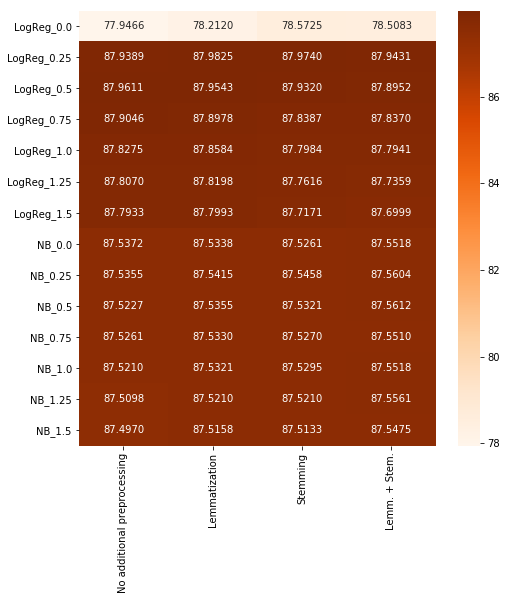

In [31]:
add_acc_df = pd.concat([lr_acc_dict[roi_full],
                        nb_acc_dict[roi_full]]).transpose()
add_acc_df.columns = pd.concat(['LogReg_' + pd.Series(lr_param, dtype='str'),
                                'NB_' + pd.Series(nb_param, dtype='str')])

plt.figure(figsize=(8, 8))
seaborn.heatmap(add_acc_df.transpose(), cmap='Oranges', annot=True, fmt='.4f', square=False)
plt.show()

#### Confusion matrix; Precision; Recall; F<sub>1</sub>-score of the best additional classifier

In [121]:
conf_mtx(pd.DataFrame(lr_out_df['5000f_lm_LogReg_0.25C']), t)

TP: 50164
FN: 8226
FP: 5808
TN: 52582

Accuracy: 87.9825

Precision: 0.8962
Recall: 0.8591
F1-score: 0.8773


(50164, 8226, 5808, 52582)

##### Time needed to evaluate

In [140]:
lr_tim_df['5000f_lm_LogReg_0.25C']

40.458

<hr style="height: 5px" />

### Ensemble methods

In [32]:
ens_acc_df = pd.concat([acc_df, pd.read_csv(f'{data_in}/acc_20180904200941.csv', index_col='Unnamed: 0')]) \
               .mean(axis=1)
ens_acc_df

1000f_ET_100est                0.855951
1000f_lm_ET_100est             0.858221
1000f_lm_LogReg_1.00C          0.862391
1000f_lm_NB_1.00alpha          0.858298
1000f_lm_NN_1000iter           0.846515
1000f_lm_RF_100e               0.853280
1000f_lm_sm_ET_100est          0.859437
1000f_lm_sm_LogReg_1.00C       0.863752
1000f_lm_sm_NB_1.00alpha       0.858854
1000f_lm_sm_NN_1000iter        0.848972
1000f_lm_sm_RF_100e            0.855326
1000f_LogReg_1.00C             0.861235
1000f_NB_1.00alpha             0.856662
1000f_NN_1000iter              0.845778
1000f_RF_100e                  0.851576
1000f_sm_ET_100est             0.859865
1000f_sm_LogReg_1.00C          0.863932
1000f_sm_NB_1.00alpha          0.858897
1000f_sm_NN_1000iter           0.850582
1000f_sm_RF_100e               0.856140
2500f_ET_100est                0.863153
2500f_lm_ET_100est             0.864240
2500f_lm_LogReg_1.00C          0.873394
2500f_lm_NB_1.00alpha          0.869104
2500f_lm_NN_1000iter           0.867991


In [33]:
ens_prob = np.exp(ens_acc_df) / np.sum(np.exp(ens_acc_df))
ens_prob

1000f_ET_100est                0.004642
1000f_lm_ET_100est             0.004653
1000f_lm_LogReg_1.00C          0.004672
1000f_lm_NB_1.00alpha          0.004653
1000f_lm_NN_1000iter           0.004599
1000f_lm_RF_100e               0.004630
1000f_lm_sm_ET_100est          0.004659
1000f_lm_sm_LogReg_1.00C       0.004679
1000f_lm_sm_NB_1.00alpha       0.004656
1000f_lm_sm_NN_1000iter        0.004610
1000f_lm_sm_RF_100e            0.004640
1000f_LogReg_1.00C             0.004667
1000f_NB_1.00alpha             0.004646
1000f_NN_1000iter              0.004595
1000f_RF_100e                  0.004622
1000f_sm_ET_100est             0.004661
1000f_sm_LogReg_1.00C          0.004680
1000f_sm_NB_1.00alpha          0.004656
1000f_sm_NN_1000iter           0.004618
1000f_sm_RF_100e               0.004643
2500f_ET_100est                0.004676
2500f_lm_ET_100est             0.004681
2500f_lm_LogReg_1.00C          0.004724
2500f_lm_NB_1.00alpha          0.004704
2500f_lm_NN_1000iter           0.004699


In [34]:
ens_out_df = pd.concat([out_df, pd.read_csv(f'{data_in}/out_20180904200941.csv', index_col='Unnamed: 0')],
                       sort=True, axis=1)
ens_out_df

,i,1000f_ET_100est,1000f_LogReg_1.00C,1000f_NB_1.00alpha,1000f_NN_1000iter,1000f_RF_100e,1000f_sm_ET_100est,1000f_sm_LogReg_1.00C,1000f_sm_NB_1.00alpha,1000f_sm_NN_1000iter,...,5000f_sw_lm_sm_LogReg_0.50C,5000f_sw_lm_sm_LogReg_0.75C,5000f_sw_lm_sm_LogReg_1.25C,5000f_sw_lm_sm_LogReg_1.50C,5000f_sw_lm_sm_NB_0.00alpha,5000f_sw_lm_sm_NB_0.25alpha,5000f_sw_lm_sm_NB_0.50alpha,5000f_sw_lm_sm_NB_0.75alpha,5000f_sw_lm_sm_NB_1.25alpha,5000f_sw_lm_sm_NB_1.50alpha
0,1,False,True,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
1,6,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,9,True,False,False,True,True,True,False,False,True,...,True,True,True,True,True,True,True,True,True,True
3,7,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,7,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,5,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,1,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,9,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,2,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,8,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [35]:
ens_tim_df = pd.concat([tim_df, pd.read_csv(f'{data_in}/tim_20180904200941.csv', index_col='Unnamed: 0')]) \
               .mean(axis=1)
ens_tim_df

1000f_ET_100est                106.8788
1000f_lm_ET_100est             105.3771
1000f_lm_LogReg_1.00C            1.0143
1000f_lm_NB_1.00alpha            1.0950
1000f_lm_NN_1000iter           166.8073
1000f_lm_RF_100e                82.0668
1000f_lm_sm_ET_100est          102.3364
1000f_lm_sm_LogReg_1.00C         0.9754
1000f_lm_sm_NB_1.00alpha         3.2238
1000f_lm_sm_NN_1000iter        170.3577
1000f_lm_sm_RF_100e             84.3284
1000f_LogReg_1.00C               1.0438
1000f_NB_1.00alpha               0.9581
1000f_NN_1000iter              167.3798
1000f_RF_100e                   80.0069
1000f_sm_ET_100est              99.0962
1000f_sm_LogReg_1.00C            1.0293
1000f_sm_NB_1.00alpha            1.0208
1000f_sm_NN_1000iter           155.0881
1000f_sm_RF_100e                78.9891
1000f_sw_ET_100est             172.4959
1000f_sw_lm_ET_100est          152.4128
1000f_sw_lm_LogReg_1.00C         1.8008
1000f_sw_lm_NB_1.00alpha         2.0288
1000f_sw_lm_NN_1000iter        174.0030


#### Combining classifiers by randomly choosing an odd number of classifiers

In [36]:
data_df = pd.read_csv(f'{data_in}/data.csv', index_col='Unnamed: 0')[['headlines', 'clickbait']]
display(data_df)

t = data_df['clickbait']

,headlines,clickbait
0,<number> indian <number> indian unrelatable te...,True
1,<number> best foods to eat when youre sick by ...,True
2,<number> best jobs in america,True
3,<number> jump street directors call jonah hill...,True
4,<number> jump street is one of the most self a...,True
5,<number> cities where your paycheck stretches ...,True
6,<number> unbelievable behind the scenes storie...,True
7,<number> love songs ranked by how much they ma...,True
8,a most violent year pulls a reverse godfather,True
9,a potato flew around my room is the world s ca...,True


#### Function to compose ensemble models

In [37]:
def compose_ensembles(acc, out, n_iter=1000, n_samples=[3], prob=None, replace=False):
    print(f'{n_samples} on {n_iter} iterations with{"" if replace else "out"} replacement...', end='\n\n')
    
    ens_list = list()

    for n_sampl in n_samples:
        print(f'{n_sampl:>2d} ...', end=' ')
        for i in range(n_iter):
            cls_sample = np.random.choice(acc.index, p=prob, replace=replace, size=n_sampl)
            y = (np.sum(out[cls_sample], axis=1) / n_sampl) >= 0.5
            ens_acc = (y == t).sum() / len(t) * 100
    #         print(cls_sample)
    #         print(ens_acc)
    #         print()
            ens_list.append(tuple([cls_sample, ens_acc]))
        print('Done!')

    return pd.DataFrame(ens_list, columns=['Classifiers', 'Accuracy (%)']).set_index('Classifiers')

##### ... with replacement

In [176]:
ens_df = compose_ensembles(ens_acc_df, ens_out_df, n_samples=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                           prob=ens_prob.values, replace=True)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21] on 1000 iterations with replacement...

 3 ... Done!
 5 ... Done!
 7 ... Done!
 9 ... Done!
11 ... Done!
13 ... Done!
15 ... Done!
17 ... Done!
19 ... Done!
21 ... Done!


In [193]:
ens_df.sort_values(by='Accuracy (%)', ascending=False).round(dec).head()

,Accuracy (%)
Classifiers,
"[5000f_LogReg_1.50C, 5000f_sm_NN_1000iter, 5000f_sw_lm_LogReg_0.25C, 5000f_RF_100e, 2500f_NN_1000iter, 5000f_lm_sm_LogReg_1.00C, 2500f_lm_NN_1000iter, 1000f_sw_sm_ET_100est, 5000f_lm_sm_NB_1.25alpha]",88.7952
"[1000f_lm_sm_RF_100e, 2500f_sw_lm_NN_1000iter, 2500f_lm_LogReg_1.00C, 2500f_lm_sm_NN_1000iter, 1000f_NN_1000iter, 2500f_lm_NN_1000iter, 5000f_lm_sm_NB_0.00alpha, 5000f_NN_1000iter, 2500f_sw_lm_sm_LogReg_1.00C, 5000f_sw_NB_1.50alpha, 5000f_lm_LogReg_0.75C, 5000f_sw_NB_1.00alpha, 2500f_lm_sm_RF_100e, 5000f_lm_sm_LogReg_1.25C, 5000f_sm_NB_0.50alpha, 5000f_sm_NN_1000iter, 5000f_LogReg_0.00C, 5000f_sm_NB_0.75alpha, 1000f_lm_sm_RF_100e]",88.7421
"[5000f_sw_sm_NB_0.50alpha, 1000f_lm_ET_100est, 1000f_sw_lm_sm_NN_1000iter, 5000f_lm_sm_NB_1.50alpha, 5000f_sm_NN_1000iter, 5000f_LogReg_1.25C, 2500f_sw_lm_RF_100e, 5000f_sw_lm_NB_0.25alpha, 5000f_lm_sm_LogReg_0.50C, 5000f_NN_1000iter, 5000f_RF_100e, 2500f_sm_LogReg_1.00C, 5000f_lm_sm_LogReg_1.50C, 2500f_sw_NB_1.00alpha, 2500f_sm_NN_1000iter]",88.7387
"[5000f_lm_sm_NN_1000iter, 2500f_lm_sm_RF_100e, 2500f_lm_NN_1000iter, 5000f_sm_NB_0.50alpha, 5000f_sw_lm_NB_0.25alpha, 5000f_sw_LogReg_1.50C, 5000f_lm_NB_1.00alpha, 5000f_LogReg_1.50C, 5000f_sm_NN_1000iter]",88.7190
"[2500f_sm_NN_1000iter, 1000f_lm_sm_ET_100est, 5000f_sm_NB_1.50alpha, 5000f_lm_NN_1000iter, 5000f_lm_LogReg_0.75C]",88.7070


##### ... without replacement

In [194]:
ens_df = compose_ensembles(ens_acc_df, ens_out_df, n_samples=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                           prob=ens_prob.values, replace=False)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21] on 1000 iterations without replacement...

 3 ... Done!
 5 ... Done!
 7 ... Done!
 9 ... Done!
11 ... Done!
13 ... Done!
15 ... Done!
17 ... Done!
19 ... Done!
21 ... Done!


In [196]:
ens_df.sort_values(by='Accuracy (%)', ascending=False).round(dec).head()

,Accuracy (%)
Classifiers,
"[5000f_NN_1000iter, 5000f_lm_sm_NB_1.50alpha, 5000f_sm_LogReg_1.50C, 5000f_lm_NN_1000iter, 2500f_sm_RF_100e, 2500f_lm_ET_100est, 2500f_sm_NN_1000iter]",88.7592
"[5000f_LogReg_0.25C, 5000f_sw_lm_NB_0.00alpha, 5000f_lm_sm_NN_1000iter, 2500f_lm_sm_NN_1000iter, 1000f_sm_LogReg_1.00C, 5000f_lm_RF_100e, 5000f_RF_100e, 1000f_sw_sm_RF_100e, 5000f_lm_sm_NB_1.25alpha, 5000f_sw_lm_sm_NN_1000iter, 5000f_sm_RF_100e, 5000f_sm_NN_1000iter, 5000f_sw_NB_0.50alpha, 5000f_sw_NB_1.50alpha, 2500f_lm_NN_1000iter]",88.7524
"[5000f_lm_sm_NB_0.50alpha, 5000f_sw_NN_1000iter, 1000f_lm_NB_1.00alpha, 5000f_LogReg_1.00C, 1000f_sm_NN_1000iter, 2500f_lm_NN_1000iter, 5000f_lm_LogReg_1.50C, 5000f_sw_lm_NB_0.00alpha, 5000f_lm_sm_NN_1000iter, 1000f_lm_sm_ET_100est, 1000f_NN_1000iter, 5000f_lm_sm_NB_0.75alpha, 5000f_lm_LogReg_0.25C, 1000f_sw_LogReg_1.00C, 2500f_RF_100e, 2500f_sw_lm_sm_NN_1000iter, 5000f_NB_0.50alpha, 5000f_sw_LogReg_1.50C, 5000f_LogReg_0.25C, 5000f_lm_LogReg_0.50C, 5000f_sm_LogReg_0.75C]",88.7489
"[5000f_lm_LogReg_0.50C, 5000f_sw_sm_LogReg_0.75C, 1000f_lm_sm_ET_100est, 5000f_sw_LogReg_0.00C, 2500f_sm_LogReg_1.00C, 2500f_NN_1000iter, 5000f_sw_lm_RF_100e, 5000f_lm_LogReg_1.25C, 5000f_NB_0.50alpha, 2500f_sw_sm_NN_1000iter, 1000f_sw_lm_NN_1000iter, 5000f_sw_LogReg_1.50C, 2500f_lm_RF_100e, 5000f_lm_NB_1.00alpha, 5000f_sw_lm_NB_1.00alpha, 5000f_lm_sm_NB_0.00alpha, 5000f_RF_100e, 1000f_lm_NN_1000iter, 5000f_LogReg_0.75C, 2500f_lm_NN_1000iter, 5000f_lm_sm_ET_100est]",88.7224
"[5000f_LogReg_1.00C, 5000f_lm_sm_LogReg_0.25C, 2500f_NB_1.00alpha, 5000f_sw_lm_LogReg_1.00C, 5000f_sw_sm_NB_0.25alpha, 5000f_LogReg_0.75C, 1000f_sw_NN_1000iter, 2500f_RF_100e, 5000f_sw_NB_1.25alpha, 1000f_lm_ET_100est, 1000f_sw_lm_RF_100e, 5000f_sm_NB_0.25alpha, 5000f_lm_LogReg_0.00C, 5000f_sw_sm_NN_1000iter, 5000f_lm_LogReg_1.50C, 1000f_NN_1000iter, 2500f_lm_RF_100e, 2500f_lm_NN_1000iter, 2500f_sm_ET_100est]",88.7053


<hr style="height: 5px" />

#### Confusion matrix; Precision; Recall; F<sub>1</sub>-score of the best overall classifier

In [125]:
ens_cls = ['5000f_LogReg_1.50C',
           '5000f_sm_NN_1000iter',
           '5000f_sw_lm_LogReg_0.25C',
           '5000f_RF_100e',
           '2500f_NN_1000iter',
           '5000f_lm_sm_LogReg_1.00C',
           '2500f_lm_NN_1000iter',
           '1000f_sw_sm_ET_100est',
           '5000f_lm_sm_NB_1.25alpha']

conf_mtx(ens_out_df[ens_cls], t)

TP: 50912
FN: 7478
FP: 5607
TN: 52783

Accuracy: 88.7952

Precision: 0.9008
Recall: 0.8719
F1-score: 0.8861


(50912, 7478, 5607, 52783)

##### Time needed to evaluate (assumption: all the classifiers can run in parallel)

In [131]:
pd.concat([results['Time'], lr_tim_df, nb_tim_df])[ens_cls].max()

5611.651